# Quantifying dambos

* **Products used:** 
[gm_s2_annual](https://explorer.digitalearth.africa/gm_s2_annual)

## Description

Calculate dambo crop stats.



***
## Getting started
​
To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 


In [19]:
import datacube
import xarray as xr
import geopandas as gpd

from datacube.utils import geometry
from deafrica_tools.spatial import xr_rasterize

## Load classified images

/tmp/ipykernel_10175/483430790.py:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  geotiff_crop = xr.open_rasterio('results/crop_prediction.tif')


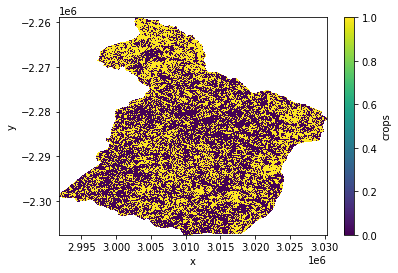

In [5]:
geotiff_crop = xr.open_rasterio('results/crop_prediction.tif')
crop_pred = geotiff_crop.to_dataset('band')
crop_pred = crop_pred.rename({1: 'crops'})

crop_pred.crops.plot()

/tmp/ipykernel_10175/1441200923.py:4: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  geotiff_dambo = xr.open_rasterio('results/dambo_prediction.tif')
/env/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


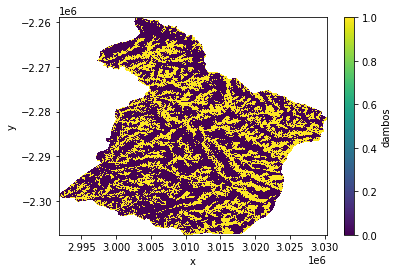

In [22]:
gdf = gpd.read_file('data/Dambo_study_area.shp')
geom = geometry.Geometry(gdf.unary_union, gdf.crs)

geotiff_dambo = xr.open_rasterio('results/dambo_prediction.tif')
dambo_pred = geotiff_dambo.to_dataset('band')
mask = xr_rasterize(gdf, dambo_pred)
dambo_pred = dambo_pred.rename({1: 'dambos'})
dambo_pred = dambo_pred.where(mask)
dambo_pred.dambos.plot()